# About DataSet

# Set Up

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
def nullscan(df_check, save=False):
    df_nulls = df_check.isna()

    nulls_per_col = df_nulls.sum(axis=0)
    # the rate makes it way more interpretable:
    nulls_per_col /= len(df_check.index)

    with plt.style.context('dark_background'):
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 10))
    
        vir = matplotlib.cm.get_cmap('viridis')
        colormap = matplotlib.colors.ListedColormap([vir(0), 'darkorange'])
        sns.heatmap(df_check.isnull(), cmap=colormap, cbar=False, yticklabels=False, ax=ax1)
    
        nulls_per_col.plot(kind='bar', color='darkorange', x=nulls_per_col.values, 
                           y=nulls_per_col.index, ax=ax2, width=1, linewidth=1, 
                           edgecolor='black', align='edge', label='Null value rate')
        
        ax2.set_ylim((0,1))
        # centered labels
        labels=df_check.columns
        ticks = np.arange(0.5, len(labels))
        ax2.xaxis.set(ticks=ticks, ticklabels=labels)
    

        ax2.spines['top'].set_color('black')
        ax2.spines['right'].set_color('black')
        
        
        
        # workaround to visualize very small amounts of null values per col
        na_ticks = ticks[(nulls_per_col > 0) & (nulls_per_col < 0.05)]
        if (len(na_ticks) > 0):
            ax2.plot(na_ticks, [0,]*len(na_ticks), 's', c='darkorange', markersize=10, 
                     label='Very few missing values')
    
        fig.suptitle('Null Value Rate per Column', fontsize=30, y=1.05)
        ax2.legend()
        fig.tight_layout() 
        if(save):
            plt.savefig('nullscan.png')
        plt.show()

# Join the Data

In [3]:
wine1 = pd.read_csv("./Datasets/wine1.csv")
wine2 = pd.read_csv("./Datasets/wine2.csv")

In [4]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
wine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [6]:
wine = pd.concat([wine1, wine2])

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 150929
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             280901 non-null  int64  
 1   country                280833 non-null  object 
 2   description            280901 non-null  object 
 3   designation            197701 non-null  object 
 4   points                 280901 non-null  int64  
 5   price                  258210 non-null  float64
 6   province               280833 non-null  object 
 7   region_1               234594 non-null  object 
 8   region_2               111464 non-null  object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                280900 non-null  object 
 13  winery                 280901 non-null  object 
dtypes: float64(1), int64(2), object(11)


# Data Cleaning

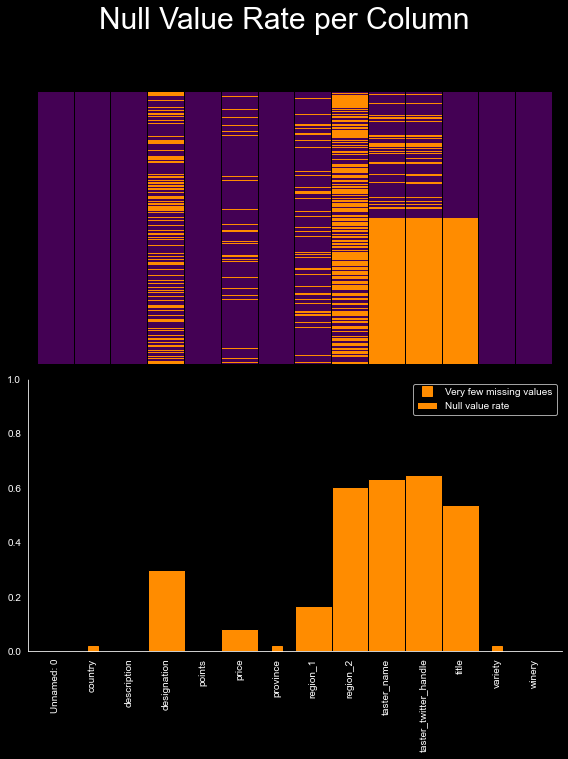

In [8]:
nullscan(wine)


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 30.0+ MB


In [9]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [11]:
wine.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
wine.dropna(subset=['country', 'province', 'variety'], inplace=True)

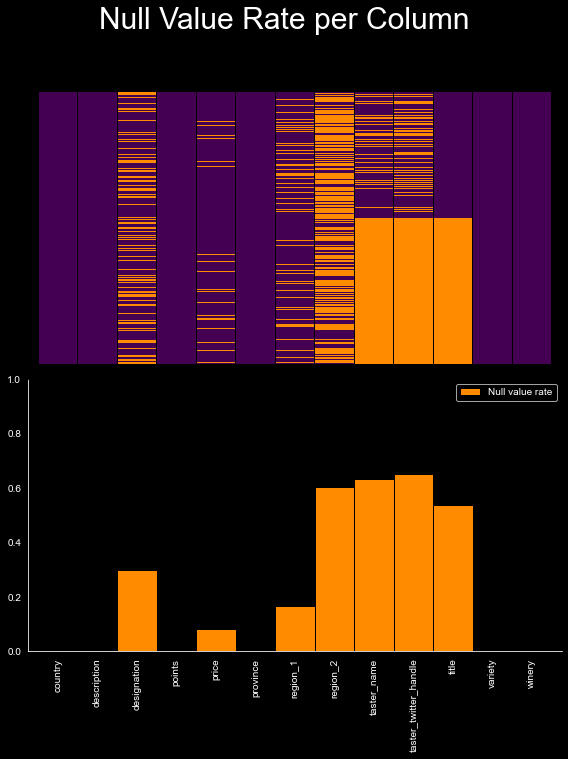

In [15]:
nullscan(wine, save=True)

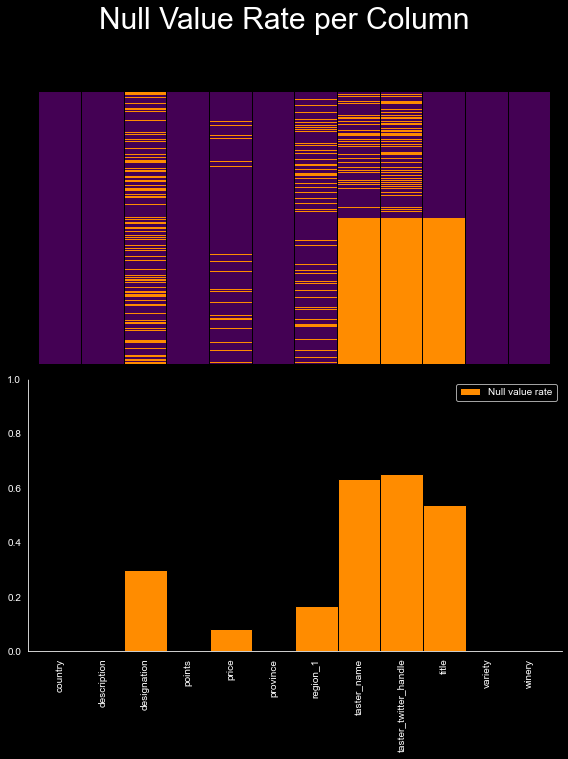

In [18]:
#wine.drop('region_2', axis=1, inplace=True)
nullscan(wine)

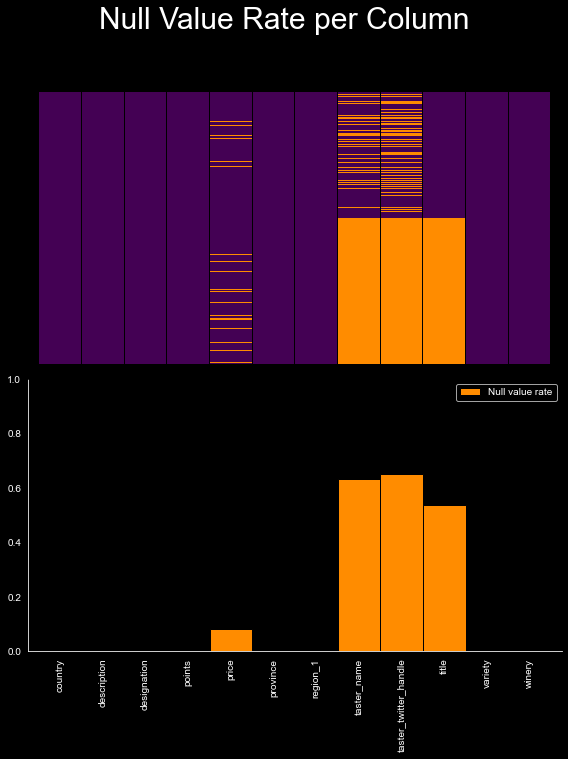

In [19]:
wine[['designation', 'region_1']] = wine[['designation', 'region_1']].fillna('Unknown')
nullscan(wine)

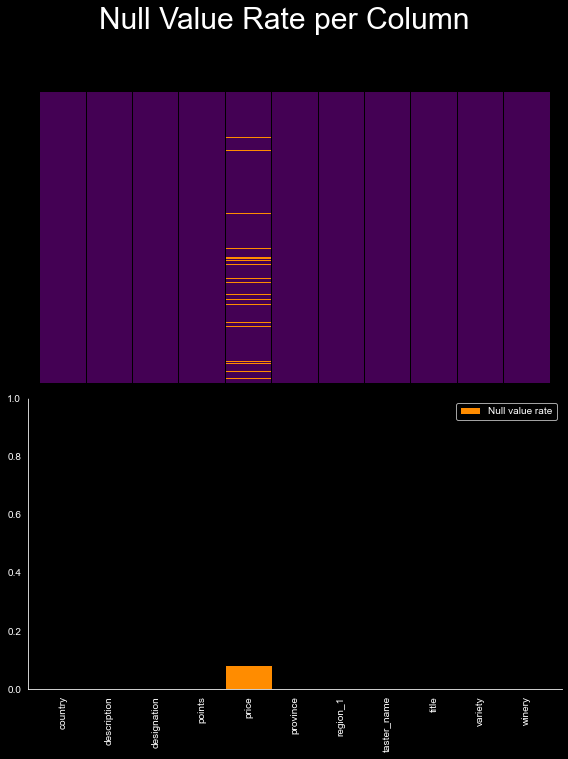

In [24]:
#wine = wine.drop('taster_twitter_handle', axis=1)
wine['taster_name'] = wine['taster_name'].fillna('Unknown')
wine['title'] = wine['title'].fillna('Unknown')
nullscan(wine)

In [35]:
wine.dropna( inplace=True)

In [36]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258145 entries, 1 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      258145 non-null  object 
 1   description  258145 non-null  object 
 2   designation  258145 non-null  object 
 3   points       258145 non-null  int64  
 4   price        258145 non-null  float64
 5   province     258145 non-null  object 
 6   region_1     258145 non-null  object 
 7   taster_name  258145 non-null  object 
 8   title        258145 non-null  object 
 9   variety      258145 non-null  object 
 10  winery       258145 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 23.6+ MB


In [39]:
wine.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",Unknown,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [40]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258145 entries, 0 to 258144
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      258145 non-null  object 
 1   description  258145 non-null  object 
 2   designation  258145 non-null  object 
 3   points       258145 non-null  int64  
 4   price        258145 non-null  float64
 5   province     258145 non-null  object 
 6   region_1     258145 non-null  object 
 7   taster_name  258145 non-null  object 
 8   title        258145 non-null  object 
 9   variety      258145 non-null  object 
 10  winery       258145 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 21.7+ MB


In [46]:
wine.duplicated().sum()

57480

In [48]:
wine.drop_duplicates(inplace=True)

In [49]:
wine.duplicated().sum()

0

In [51]:
wine.to_csv("./Datasets/wine_clean.csv", index=False)

In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv("./Datasets/wine_clean.csv")

In [6]:
wine.isnull().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

In [9]:

df_ue = pd.DataFrame(wine.country.unique(), columns=["country"])

In [10]:
df_ue

,country
0,Portugal
1,US
2,Spain
3,Italy
4,France
5,Germany
6,Argentina
7,Chile
8,Australia
9,Austria


In [27]:
index_list = [0, 2, 3,4,5,9, 13,14,15,20, 21, 22,33, 34, 43]
wine_ue = df_ue.iloc[index_list]

In [30]:
df_ue = wine.loc[wine["country"].isin(wine_ue["country"])]

In [31]:
df_ue["country"].unique()

array(['Portugal', 'Spain', 'Italy', 'France', 'Germany', 'Austria',
       'Hungary', 'Greece', 'Romania', 'Slovenia', 'Luxembourg',
       'Croatia', 'Bulgaria', 'Cyprus', 'Lithuania'], dtype=object)

In [33]:
df_ue.to_csv("./Datasets/wine_ue.csv", index=False)

In [34]:
df_ue["country"].unique()

array(['Portugal', 'Spain', 'Italy', 'France', 'Germany', 'Austria',
       'Hungary', 'Greece', 'Romania', 'Slovenia', 'Luxembourg',
       'Croatia', 'Bulgaria', 'Cyprus', 'Lithuania'], dtype=object)

In [ ]:
df_ue["country"]